###### This is where it all comes together.  

1: pull data from database

2: clean up and merge files

3: balance data

4: run learning process

In [1]:
%matplotlib inline
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt  

from IPython.display import display
pd.options.display.max_colwidth = 150

print 'ready'

ready


In [7]:
import MySQLdb
from lib import trlib as trsubs

def dosql(sql):
    try:
        cursor.execute(sql)
        db.commit()
    except TypeError as e:
        print "could not update"
        print (e)
 
db, cursor = trsubs.openmysql()

## quora_dd_2 has had its contractions expanded.  So, fewer apostophe's to worry about.
data             = pd.read_sql('SELECT * FROM quora_dd_2', con=db)

#first_words      = pd.read_sql('SELECT * FROM first_words', con=db)
#first_words_long = pd.read_sql('SELECT * FROM first_words_long', con=db)
first_words      = pd.read_sql('SELECT * FROM first_words_num', con=db)
nf1              = pd.read_sql('SELECT * FROM nf1_onehot', con=db)
nf2              = pd.read_sql('SELECT * FROM nf2_onehot', con=db)

count_features   = pd.read_sql('SELECT * FROM count_features_2', con=db)
quoted_strings   = pd.read_sql('SELECT * FROM quoted_string_is_present', con=db)

wvec_distance    = pd.read_sql('SELECT * FROM distance_measures_wvec', con=db)
pvec_distance    = pd.read_sql('SELECT * FROM distance_measures_pvec', con=db)
tvec_distance    = pd.read_sql('SELECT * FROM distance_measures_tvec', con=db)
dvec_distance    = pd.read_sql('SELECT * FROM distance_measures_dvec', con=db)

ord_distance     = pd.read_sql('SELECT * FROM distance_measures_ordered', con=db)
cub_distance     = pd.read_sql('SELECT * FROM distance_measures_cubed', con=db)
mix_distance     = pd.read_sql('SELECT * FROM distance_measures_mixtok', con=db)
spacy_based      = pd.read_sql('SELECT * FROM spacy_distance_measures', con=db)

movement         = pd.read_sql('SELECT * FROM named_entity_movement_final', con=db)
rotation         = pd.read_sql('SELECT * FROM rotation_factors_final', con=db)
entity_counts    = pd.read_sql('SELECT * FROM named_entity_counts_6', con=db)

#cursor.execute("show tables")
#results = cursor.fetchall()
#for row in results: print row

trsubs.closemysql(db)
print 'data ready'

(u'core_entities',)
(u'count_features',)
(u'count_features_2',)
(u'distance_measures_av',)
(u'distance_measures_cubed',)
(u'distance_measures_dvec',)
(u'distance_measures_mixtok',)
(u'distance_measures_ordered',)
(u'distance_measures_pvec',)
(u'distance_measures_sub',)
(u'distance_measures_tvec',)
(u'distance_measures_wvec',)
(u'eppd',)
(u'first_words',)
(u'first_words_long',)
(u'first_words_num',)
(u'named_entity_counts',)
(u'named_entity_counts_6',)
(u'named_entity_movement',)
(u'named_entity_movement_final',)
(u'nf1_onehot',)
(u'nf2_onehot',)
(u'peak_var',)
(u'quora_backup',)
(u'quora_dd',)
(u'quora_dd_2',)
(u'quoted_string_is_present',)
(u'rotation_factors_final',)
(u'salience',)
(u'spacy_distance_measures',)
(u'spacy_sim_values',)
(u'word_counts',)
(u'xtra_entities',)
data ready


In [8]:
print 'data', len(data), list(data), '\n'

print 'first_words', len(first_words), list(first_words), '\n'
print 'nf1', len(nf1), list(nf1), '\n'
print 'nf2', len(nf2), list(nf2), '\n'

print 'count_features', len(count_features), list(count_features), '\n'
print 'quoted_strings', len(quoted_strings), list(quoted_strings), '\n'

print 'wvec', len(wvec_distance), list(wvec_distance), '\n'
print 'pvec', len(pvec_distance), list(pvec_distance), '\n'
print 'tvec', len(tvec_distance), list(tvec_distance), '\n'
print 'dvec', len(dvec_distance), list(dvec_distance), '\n'

print 'ord', len(ord_distance), list(ord_distance), '\n'
print 'cub', len(cub_distance), list(cub_distance), '\n'
print 'mix', len(mix_distance), list(mix_distance), '\n'

print 'movement', len(movement), list(movement), '\n'
print 'ent_counts', len(entity_counts), list(entity_counts), '\n'
print 'rotation', len(rotation), list(rotation), '\n'

print len(spacy_based), list(spacy_based), '\n'

data 388060 ['linekey', 'question1', 'question2', 'Y', 'g1', 'g2', 'iid1', 'iid2', 'metagroup1', 'metagroup2'] 

first_words 388060 ['linekey', 'f1dist', 'f2dist', 'fm1', 'fm2', 'head_dist1', 'head_dist2', 'pos_dist1', 'pos_dist2', 'headpos_dist1', 'headpos_dist2', 'tag_dist1', 'tag_dist2', 'headtag_dist1', 'headtag_dist2', 'dep_dist1', 'dep_dist2', 'headdep_dist1', 'headdep_dist2', 'blob_sim'] 

nf1 388060 ['linekey', 'time_class_1', 'place_class_1', 'person_class_1', 'fillblank_class_1', 'time_class_2', 'place_class_2', 'person_class_2', 'fillblank_class_2', 'yesno_class_2', 'time_match', 'place_match', 'person_match', 'fillblank_match', 'yesno_match', 'be_1', 'be_2', 'do_1', 'do_2', 'can_1', 'can_2', 'should_1', 'should_2', 'will_1', 'will_2', 'have_1', 'have_2', 'would_1', 'would_2', 'could_1', 'could_2', 'when_1', 'when_2', 'where_1', 'where_2', 'who_1', 'who_2', 'whom_1', 'whom_2', 'what_1', 'what_2', 'how_1', 'how_2', 'why_1', 'why_2', 'which_1', 'which_2', 'if_1', 'if_2', 'for_

In [10]:
## merge the tables into one

def prep_table(table, table_key):
    table_dist  = 'dist_'+table_key
    table_cos   = 'cos_'+table_key
    table_angle = 'angle_'+table_key

    table.rename(columns={'dist':table_dist,'cos':table_cos,'angle':table_angle},\
                                                                   inplace=True)
    nt = table[['linekey', table_dist, table_cos, table_angle]]
    return nt

def prep_ev_table(table, table_key):
    vi_table_dist  = 'vidist_'+table_key
    ex_table_dist  = 'exdist_'+table_key
    table_cos      = 'cos_'+table_key
    table_angle    = 'angle_'+table_key

    table.rename(columns={'vidist':vi_table_dist,'exdist':ex_table_dist, \
                          'cos':table_cos,'angle':table_angle}, inplace=True)
    nt = table[['linekey', vi_table_dist, ex_table_dist, table_cos, table_angle]]
    return nt

def prep_cub_table(table, table_key):
    table_cos   = 'cos_'+table_key
    table_angle = 'angle_'+table_key

    table.rename(columns={'cos':table_cos,'angle':table_angle}, inplace=True)
    nt = table[['linekey', table_cos, table_angle]]
    return nt

def merge_in(left_table, right_table):
    merged = left_table.merge(right_table, on='linekey')
    return merged


merged = merge_in(prep_table(wvec_distance, 'wvec'), \
                  prep_table(dvec_distance, 'dvec'))
merged = merge_in(prep_table(tvec_distance, 'tvec'), merged)
merged = merge_in(prep_table(pvec_distance, 'pvec'), merged)

merged = merge_in(prep_ev_table(ord_distance, 'ord'), merged)
merged = merge_in(prep_ev_table(mix_distance, 'mix'), merged)
merged = merge_in(prep_cub_table(cub_distance, 'cub'), merged)

merged = merge_in(count_features, merged)
merged = merge_in(quoted_strings, merged)
merged = merge_in(first_words, merged)
merged = merge_in(nf1, merged)
merged = merge_in(nf2, merged)
merged = merge_in(movement, merged)
merged = merge_in(entity_counts, merged)
merged = merge_in(rotation, merged)
merged = merge_in(spacy_based, merged)
merged = merge_in(data, merged)

merged = merged[['Y',\
 'spacydist','spacycos','lem_nostop_dist','lem_nostop_cos','nostop_lem_corrdist',\
 'sumrotation1','sumrotation2','maxrotation1','maxrotation2',\
 'numrotated1','numrotated2','senlen1','senlen2','percent_rotated1','percent_rotated2',\
 'score','antiscore','narrow_score','narrow_antiscore', \
 'basedist','exbasedist','basecos',\
 'vi_dist','ex_dist','cos',\
 'vi_diff','ex_diff','cos_diff',\
 'f1dist','f2dist','fm1','fm2','head_dist1','head_dist2','pos_dist1','pos_dist2',\
 'headpos_dist1','headpos_dist2','tag_dist1','tag_dist2','headtag_dist1','headtag_dist2',\
 'dep_dist1','dep_dist2','headdep_dist1','headdep_dist2',\
 'blob_sim',\
 'quoted_string_is_present',\
 'ccq1','ccq2','ccdiff','wcq1','wcq2','abs_ccdiff','abs_wcdiff','r1','r2','abs_rr',\
 'odds_by_charcountdiff', 'odds_by_wordcountdiff',\
 'cos_cub','angle_cub','vidist_mix','exdist_mix',\
 'cos_mix','angle_mix','vidist_ord','exdist_ord','cos_ord','angle_ord','dist_pvec',\
 'cos_pvec','angle_pvec','dist_tvec',\
 'cos_tvec','angle_tvec','dist_wvec',\
 'cos_wvec','angle_wvec','dist_dvec','cos_dvec','angle_dvec',\
 'time_class_1', 'place_class_1', 'person_class_1', 'fillblank_class_1', \
 'time_class_2', 'place_class_2', 'person_class_2', 'fillblank_class_2', \
 'yesno_class_2', 'time_match', 'place_match', 'person_match', 'fillblank_match', \
 'yesno_match', 'be_1', 'be_2', 'do_1', 'do_2', 'can_1', 'can_2', 'should_1', 'should_2', \
 'will_1', 'will_2', 'have_1', 'have_2', 'would_1', 'would_2', 'could_1', 'could_2', \
 'when_1', 'when_2', 'where_1', 'where_2', 'who_1', 'who_2', 'whom_1', 'whom_2', 'what_1', \
 'what_2', 'how_1', 'how_2', 'why_1', 'why_2', 'which_1', 'which_2', 'if_1', 'if_2', \
 'for_1', 'for_2', 'explain_1', 'explain_2', 'ADV_pos_1', 'ADV_pos_2', \
 'NOUN_pos_1', 'NOUN_pos_2', 'ADP_pos_1', 'ADP_pos_2', 'PRON_pos_1', 'PRON_pos_2', \
 'PROPN_pos_1', 'PROPN_pos_2', 'SPACE_pos_1', 'SPACE_pos_2', 'DET_pos_1', 'DET_pos_2', \
 'SYM_pos_1', 'SYM_pos_2', 'INTJ_pos_1', 'INTJ_pos_2', 'PART_pos_1', 'PART_pos_2', \
 'PUNCT_pos_1', 'PUNCT_pos_2', 'VERB_pos_1', 'VERB_pos_2', 'X_pos_1', 'X_pos_2', \
 'CCONJ_pos_1', 'CCONJ_pos_2', 'NUM_pos_1', 'NUM_pos_2', 'ADJ_pos_1', 'ADJ_pos_2',\
 '_dep_1', '_dep_2', 'cc_dep_1', 'cc_dep_2', 'intj_dep_1', 'intj_dep_2', 'meta_dep_1', \
 'meta_dep_2', 'nsubjpass_dep_1', 'nsubjpass_dep_2', 'csubj_dep_1', 'csubj_dep_2', \
 'oprd_dep_1', 'oprd_dep_2', 'neg_dep_1', 'neg_dep_2', 'csubjpass_dep_1', \
 'csubjpass_dep_2', 'mark_dep_1', 'mark_dep_2', 'auxpass_dep_1', 'auxpass_dep_2', \
 'advcl_dep_1', 'advcl_dep_2', 'aux_dep_1', 'aux_dep_2', 'amod_dep_1', 'amod_dep_2', \
 'ROOT_dep_1', 'ROOT_dep_2', 'prep_dep_1', 'prep_dep_2', 'nsubj_dep_1', 'nsubj_dep_2', \
 'nummod_dep_1', 'nummod_dep_2', 'advmod_dep_1', 'advmod_dep_2', 'punct_dep_1', \
 'punct_dep_2', 'quantmod_dep_1', 'quantmod_dep_2', 'acomp_dep_1', 'acomp_dep_2', \
 'compound_dep_1', 'compound_dep_2', 'ccomp_dep_1', 'ccomp_dep_2', 'poss_dep_1', \
 'poss_dep_2', 'npadvmod_dep_1', 'npadvmod_dep_2', 'attr_dep_1', 'attr_dep_2', \
 'dep_dep_1', 'dep_dep_2', 'det_dep_1', 'det_dep_2', 'nmod_dep_1', 'nmod_dep_2', \
 'dobj_dep_1', 'dobj_dep_2', 'dative_dep_1', 'dative_dep_2', 'pobj_dep_1', 'pobj_dep_2', \
 'expl_dep_1', 'expl_dep_2', 'predet_dep_1', 'predet_dep_2', 'preconj_dep_1', \
 'preconj_dep_2', 'behead_2', '_headdep_1', '_headdep_2', 'cc_headdep_1', 'cc_headdep_2', \
 'intj_headdep_1', 'intj_headdep_2', 'meta_headdep_1', 'meta_headdep_2', \
 'nsubjpass_headdep_1', 'nsubjpass_headdep_2', 'csubj_headdep_1', 'csubj_headdep_2', \
 'oprd_headdep_1', 'oprd_headdep_2', 'neg_headdep_1', 'neg_headdep_2', \
 'csubjpass_headdep_1', 'csubjpass_headdep_2', 'mark_headdep_1', 'mark_headdep_2', \
 'auxpass_headdep_1', 'auxpass_headdep_2', 'advcl_headdep_1', 'advcl_headdep_2', \
 'aux_headdep_1', 'aux_headdep_2', 'amod_headdep_1', 'amod_headdep_2', 'ROOT_headdep_1', \
 'ROOT_headdep_2', 'prep_headdep_1', 'prep_headdep_2', 'nsubj_headdep_1', 'nsubj_headdep_2', \
 'nummod_headdep_1', 'nummod_headdep_2', 'advmod_headdep_1', 'advmod_headdep_2', \
 'punct_headdep_1', 'punct_headdep_2', 'quantmod_headdep_1', 'quantmod_headdep_2', \
 'acomp_headdep_1', 'acomp_headdep_2', 'compound_headdep_1', 'compound_headdep_2', \
 'ccomp_headdep_1', 'ccomp_headdep_2', 'poss_headdep_1', 'poss_headdep_2', \
 'npadvmod_headdep_1', 'npadvmod_headdep_2', 'attr_headdep_1', 'attr_headdep_2', \
 'dep_headdep_1', 'dep_headdep_2', 'det_headdep_1', 'det_headdep_2', 'nmod_headdep_1', \
 'nmod_headdep_2', 'dobj_headdep_1', 'dobj_headdep_2', 'dative_headdep_1', \
 'dative_headdep_2', 'pobj_headdep_1', 'pobj_headdep_2', 'expl_headdep_1', \
 'expl_headdep_2', 'predet_headdep_1', 'predet_headdep_2', 'preconj_headdep_1', \
 'preconj_headdep_2']]

mlist = list(merged)

list(merged)

['Y',
 'spacydist',
 'spacycos',
 'lem_nostop_dist',
 'lem_nostop_cos',
 'nostop_lem_corrdist',
 'sumrotation1',
 'sumrotation2',
 'maxrotation1',
 'maxrotation2',
 'numrotated1',
 'numrotated2',
 'senlen1',
 'senlen2',
 'percent_rotated1',
 'percent_rotated2',
 'score',
 'antiscore',
 'narrow_score',
 'narrow_antiscore',
 'basedist',
 'exbasedist',
 'basecos',
 'vi_dist',
 'ex_dist',
 'cos',
 'vi_diff',
 'ex_diff',
 'cos_diff',
 'f1dist',
 'f2dist',
 'fm1',
 'fm2',
 'head_dist1',
 'head_dist2',
 'pos_dist1',
 'pos_dist2',
 'headpos_dist1',
 'headpos_dist2',
 'tag_dist1',
 'tag_dist2',
 'headtag_dist1',
 'headtag_dist2',
 'dep_dist1',
 'dep_dist2',
 'headdep_dist1',
 'headdep_dist2',
 'blob_sim',
 'quoted_string_is_present',
 'ccq1',
 'ccq2',
 'ccdiff',
 'wcq1',
 'wcq2',
 'abs_ccdiff',
 'abs_wcdiff',
 'r1',
 'r2',
 'abs_rr',
 'odds_by_charcountdiff',
 'odds_by_wordcountdiff',
 'cos_cub',
 'angle_cub',
 'vidist_mix',
 'exdist_mix',
 'cos_mix',
 'angle_mix',
 'vidist_ord',
 'exdist_ord',

In [11]:
## getting things out of memory
del wvec_distance
del dvec_distance
del tvec_distance
del pvec_distance
del ord_distance
del cub_distance
del mix_distance
del data
del count_features
del quoted_strings
del first_words
del movement
del rotation
del entity_counts
del spacy_based
del nf1
del nf2

print 'all gone'

all gone


In [12]:
#-----------------------------------------------------------------------------------
# Balance the data.  Prefer to have the same number of matching and 
# non-matching question pairs
#-----------------------------------------------------------------------------------

shortnum = 0
longnum  = 1
lenser   = merged.Y.value_counts()
if(lenser[0] > lenser[1]): 
    shortnum = 1; 
    longnum  = 0; 
    
shortframe = merged[merged.Y == shortnum]
targets    = merged[merged.Y == longnum].index.tolist()
print 'There are ', len(shortframe), 'rows where Y =', shortnum, \
       'and', len(targets), 'rows where Y =', longnum, '.  Equalizing ...'

overage = len(targets) - len(shortframe)    
choice  = np.random.choice(targets, size=overage, replace=False).tolist()
tset    = set(targets)
tchoice = set(choice)
targets_remaining = list(tset - tchoice)

targets   = targets_remaining;
longframe = merged.loc[targets]
balanced  = pd.concat([longframe, shortframe])
balanced.reset_index(drop=True, inplace=True)
print balanced.Y.value_counts(), len(balanced)
print 'data ready'

There are  144282 rows where Y = 1 and 243617 rows where Y = 0 .  Equalizing ...
1    144282
0    144282
Name: Y, dtype: int64 288564
data ready


In [13]:
del merged

In [14]:
# so we don't learn on the Y values
mlist.remove('Y')        

# something wen't wrong with this .. need to fix, but it's not very important
# because cosine similarity is not the target metric in the named entity movement file
# anyway, and is barely altered by the changes there
mlist.remove('cos_diff')   
balanced = balanced.drop('cos_diff', axis=1)

In [16]:
## make sure it's clean
#balanced = balanced.fillna(0)
nancols = pd.DataFrame(balanced.isnull().sum())
nancols[nancols[0] > 0]

,0


PCA doesn't look too promising, but the random forest is ramarkable and a does better than these plots would suggest.

I'm using PCA to get 3 components below, but prefer 2d plots.  Thus, there are three of them.  The plot on the right is what you would see if the "arrow" in the left and middle plots were coming directly at you.

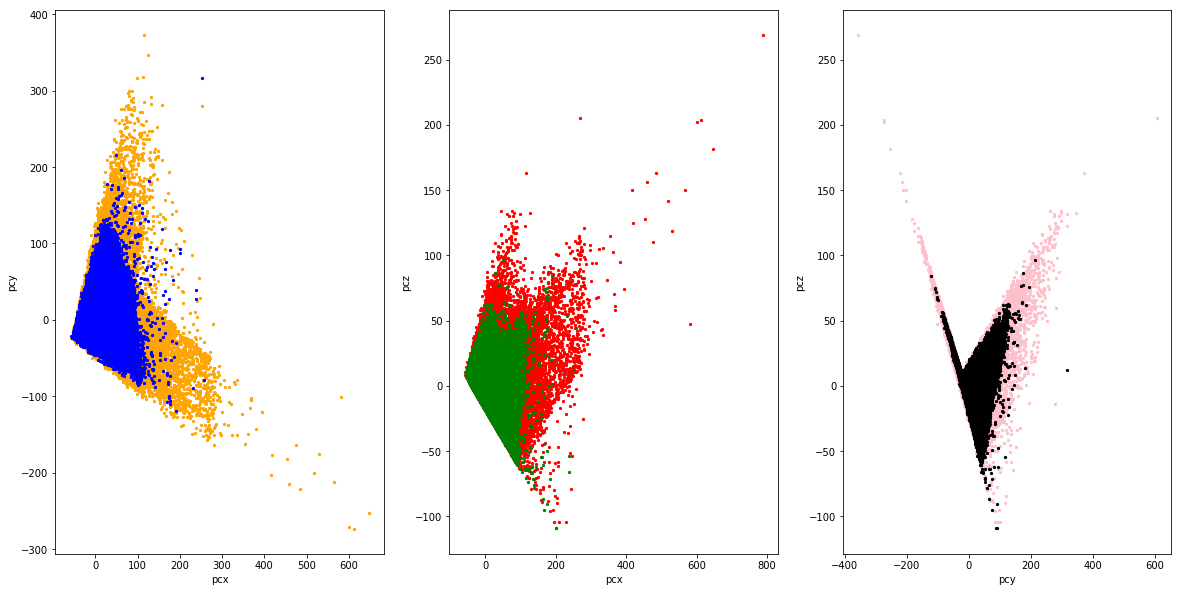

In [17]:
smalldata = balanced.copy()
m1 = np.asarray(smalldata)

from sklearn.decomposition import PCA, IncrementalPCA
pca = PCA(n_components=3)  
principal_components = pca.fit_transform(m1)
smalldata.loc[smalldata.index,'pcx'] = principal_components[:, 0] 
smalldata.loc[smalldata.index,'pcy'] = principal_components[:, 1]
smalldata.loc[smalldata.index,'pcz'] = principal_components[:, 2]

fig, axs = plt.subplots(1,3, figsize=(20, 10))
smalldata[(smalldata.Y==0)&(smalldata.pcy<400)&(smalldata.pcy>-300)&(smalldata.pcx<1000)]\
                      .plot(ax=axs[0],s=5,x='pcx',y='pcy',kind='scatter',color='orange');
smalldata[(smalldata.Y==1)&(smalldata.pcy<400)&(smalldata.pcy>-300)&(smalldata.pcx<1000)]\
                      .plot(ax=axs[0],s=5,x='pcx',y='pcy',kind='scatter',color='blue');

smalldata[(smalldata.Y==0)&(smalldata.pcz<500)&(smalldata.pcz>-300)&(smalldata.pcx<1000)]\
                      .plot(ax=axs[1],s=5,x='pcx',y='pcz',kind='scatter',color='red');
smalldata[(smalldata.Y==1)&(smalldata.pcz<500)&(smalldata.pcz>-300)&(smalldata.pcx<1000)]\
                      .plot(ax=axs[1],s=5,x='pcx',y='pcz',kind='scatter',color='green');

smalldata[(smalldata.Y==0)&(smalldata.pcz<300)&(smalldata.pcz>-300)&(smalldata.pcy>-400)]\
                      .plot(ax=axs[2],s=5,x='pcy',y='pcz',kind='scatter',color='pink');
smalldata[(smalldata.Y==1)&(smalldata.pcz<300)&(smalldata.pcz>-300)&(smalldata.pcy>-400)]\
                      .plot(ax=axs[2],s=5,x='pcy',y='pcz',kind='scatter',color='black');
    
del smalldata
del m1

Time to learn

There is no cross validation in the steps below, due to a hardware limitation.  However, both the train_test split step below and the balancing step above randomize the data, so running the whole notebook X times should provide sufficient validation. 

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes             import MultinomialNB
from sklearn.model_selection         import train_test_split
from sklearn.metrics                 import classification_report
from sklearn.metrics                 import accuracy_score

def make_xy(d): 
    X = d[mlist]    
    print "Using these features:", list(X)

    y = d.Y 
    return X, y


def learn_from(learn_data, algo):
    x, y = make_xy(learn_data)
    
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.50) 

    print xtrain.shape
    
    if(algo == "rf"): # random forest
        brain = RandomForestClassifier(n_estimators=160,     # number of trees
                                       criterion='entropy',  # default: 'gini'
                                       random_state=1)
        brain.fit(xtrain, ytrain)
        predictions = brain.predict(xtest)
    else:             # naive bayes
        brain = MultinomialNB(alpha=1).fit(xtrain, ytrain)
        predictions = brain.predict(xtest)

    print '    accuracy = ', accuracy_score(ytest, predictions)
    return predictions, xtest, ytest, brain


In [19]:
predictions, xtest, ytest, brain = learn_from(learn_data=balanced, algo="rf")

review_frame                = pd.DataFrame(xtest)
review_frame['Y']           = ytest
review_frame['predictions'] = predictions

print '\n'
print 'predictions value counts:\n', review_frame.predictions.value_counts(), '\n'
print '      Y val value counts:\n', review_frame.Y.value_counts(), '\n'

Using these features: ['spacydist', 'spacycos', 'lem_nostop_dist', 'lem_nostop_cos', 'nostop_lem_corrdist', 'sumrotation1', 'sumrotation2', 'maxrotation1', 'maxrotation2', 'numrotated1', 'numrotated2', 'senlen1', 'senlen2', 'percent_rotated1', 'percent_rotated2', 'score', 'antiscore', 'narrow_score', 'narrow_antiscore', 'basedist', 'exbasedist', 'basecos', 'vi_dist', 'ex_dist', 'cos', 'vi_diff', 'ex_diff', 'f1dist', 'f2dist', 'fm1', 'fm2', 'head_dist1', 'head_dist2', 'pos_dist1', 'pos_dist2', 'headpos_dist1', 'headpos_dist2', 'tag_dist1', 'tag_dist2', 'headtag_dist1', 'headtag_dist2', 'dep_dist1', 'dep_dist2', 'headdep_dist1', 'headdep_dist2', 'blob_sim', 'quoted_string_is_present', 'ccq1', 'ccq2', 'ccdiff', 'wcq1', 'wcq2', 'abs_ccdiff', 'abs_wcdiff', 'r1', 'r2', 'abs_rr', 'odds_by_charcountdiff', 'odds_by_wordcountdiff', 'cos_cub', 'angle_cub', 'vidist_mix', 'exdist_mix', 'cos_mix', 'angle_mix', 'vidist_ord', 'exdist_ord', 'cos_ord', 'angle_ord', 'dist_pvec', 'cos_pvec', 'angle_pvec',

############ BEGIN H2O ####################

Trying out the H20 implementation of the random forest because I read that it handles categorical data gracefully.  

In [20]:
## H2O
## https://medium.com/tech-vision/random-forest-classification-with-h2o-python-for-beginners-b31f6e4ccf3c
import h2o
from h2o.estimators import H2ORandomForestEstimator

## https://stackoverflow.com/questions/43095970/creating-h2o-dataframe-from-pandas-and-unicode-error

In [21]:
## start H2O
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_31"; Java(TM) SE Runtime Environment (build 1.8.0_31-b13); Java HotSpot(TM) 64-Bit Server VM (build 25.31-b07, mixed mode)
  Starting server from /usr/local/lib/python2.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/3b/zj2f12nn6_lgrv18zv3mbjjc0000gn/T/tmpIUTH8r
  JVM stdout: /var/folders/3b/zj2f12nn6_lgrv18zv3mbjjc0000gn/T/tmpIUTH8r/h2o_cntrtrst_started_from_python.out
  JVM stderr: /var/folders/3b/zj2f12nn6_lgrv18zv3mbjjc0000gn/T/tmpIUTH8r/h2o_cntrtrst_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,40 secs
H2O cluster version:,3.16.0.4
H2O cluster version age:,1 month and 13 days
H2O cluster name:,H2O_from_python_cntrtrst_3uu06h
H2O cluster total nodes:,1
H2O cluster free memory:,910 Mb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://127.0.0.1:54321
H2O connection proxy:,None


In [22]:
## get an H2O frame
hf = h2o.H2OFrame(balanced)

del balanced
print 'gone'

Parse progress: |█████████████████████████████████████████████████████████| 100%
gone


In [23]:
training_columns = mlist

# Output parameter train against input parameters
response_column = 'Y'

# Split data into train and testing
train, test = hf.split_frame(ratios=[0.5])

# Define model
#model = H2ORandomForestEstimator(ntrees=120, max_depth=15, nfolds=5)
model = H2ORandomForestEstimator(ntrees=160)

# Train model
model.train(x=training_columns, y=response_column, training_frame=train)

# Show performance
performance = model.model_performance(test_data=test)
print performance

drf Model Build progress: |███████████████████████████████████████████████| 100%

ModelMetricsRegression: drf
** Reported on test data. **

MSE: 0.151217192842
RMSE: 0.388866548886
MAE: 0.31724143171
RMSLE: 0.273270546747
Mean Residual Deviance: 0.151217192842



In [24]:
h2o.cluster().shutdown()

H2O session _sid_ae24 closed.


In [20]:
############### END H2O #########################